# Video games (backloggd.com)

**Statistical data analysis (SDA)**
***

About the site **Backloggd**:

"**Backloggd** is a place to keep your personal video game collection. Every game from every platform is here for you to log into your journal. Follow friends along the way to share your reviews and compare ratings. Then use filters to sort through your collection and see what matters to you. Keep a backlog of what you are currently playing and what you want to play, see the numbers change as you continue to log your playthroughs. There"s Goodreads for books, Letterboxd for movies, and now Backloggd for games.

All game related metadata comes from the community driven database **[IGDB](https://www.igdb.com/)**. This includes all game, company and platform data you see on the site." - 
from the site **[backloggd.com](https://www.backloggd.com/)**.

**The purpose of exploratory data analysis**: the regularities discovered at the stage of exploratory analysis should be confirmed by statistical tests. Evaluate the suitability of the discovered patterns for use in machine learning.

**Exploratory data analysis steps**:
1. [Data overview](#data_overview).
2. [Estimation_distributions](#estimation_distributions):
    1. [Video game rating distribution](#video_game_rating_distribution):
        - [normal distribution test](#normal_distribution_test);
        - [by genres](#rating_distribution_by_genres);
        - [by developers](#rating_distribution_by_developers);
        - [by platform](#rating_distribution_by_platforms);
3. [Conclusions](#conclusions)
***

In [30]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec
from scipy import stats

## <a id=data_overview>Data overview</a>
***


Uploading a file with **pre-processed data** at the stage of exploratory analysis.

In [31]:
df = pd.read_csv("../data/backloggd/backloggd_processed.csv")

In [32]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74821 entries, 0 to 74820
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        74821 non-null  object 
 1   date        74821 non-null  object 
 2   developers  74821 non-null  object 
 3   rating      35224 non-null  float64
 4   platforms   74821 non-null  object 
 5   genres      74821 non-null  object 
 6   category    74821 non-null  object 
 7   main        74821 non-null  object 
 8   reviews     74821 non-null  int64  
 9   plays       74821 non-null  int64  
 10  playing     74821 non-null  int64  
 11  backlogs    74821 non-null  int64  
 12  wishlists   74821 non-null  int64  
 13  indie       74821 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 40.6 MB


In [33]:
df.head()

,name,date,developers,rating,platforms,genres,category,main,reviews,plays,playing,backlogs,wishlists,indie
0,Cathode Ray Tube Amusement Device,1947-12-31,[],3.7,['Analogue electronics'],['Point-and-Click'],main,Cathode Ray Tube Amusement Device,33,57,1,11,28,False
1,Bertie the Brain,1950-08-25,['Josef Kates'],1.3,['Arcade'],"['Puzzle', 'Tactical']",main,Bertie the Brain,3,5,0,3,3,False
2,Draughts,1952-08-31,['Christopher Strachey'],NaN,['Legacy Computer'],['Card & Board Game'],main,Draughts,1,3,0,1,0,False
3,OXO,1952-12-31,"['Alexander Shafto ""Sandy"" Douglas', 'Universi...",3.5,"['Windows PC', 'EDSAC']","['Puzzle', 'Strategy']",main,OXO,9,25,0,6,7,False
4,Pool,1954-06-26,[],NaN,['Legacy Computer'],['Sport'],main,Pool,1,1,0,0,0,False


In [34]:
df.tail()

,name,date,developers,rating,platforms,genres,category,main,reviews,plays,playing,backlogs,wishlists,indie
74816,Dragon Ball: Xenoverse 2 - Hero of Justice: Pa...,2023-05-11,[],NaN,['Nintendo Switch'],['Adventure'],pack,Dragon Ball: Xenoverse 2,0,1,0,0,1,False
74817,Alone in the Dark Prologue: Grace in the Dark,2023-05-25,"['THQ Nordic', 'Pieces Interactive']",2.7,"['Windows PC', 'PlayStation 5', 'Xbox Series']",['Adventure'],pack,Alone in the Dark,28,76,1,13,15,False
74818,Etrian Odyssey III HD Character Set DLC,2023-06-01,"['Sega', 'Atlus']",NaN,"['Windows PC', 'Nintendo Switch']","['Adventure', 'RPG']",pack,Etrian Odyssey III HD,0,0,0,0,1,False
74819,Etrian Odyssey HD Character Set DLC,2023-06-01,"['Sega', 'Atlus']",NaN,"['Windows PC', 'Nintendo Switch']","['Adventure', 'RPG']",pack,Etrian Odyssey HD,1,1,0,0,1,False
74820,Etrian Odyssey II HD: Character Set DLC,2023-06-01,"['Sega', 'Atlus']",NaN,"['Windows PC', 'Nintendo Switch']","['Adventure', 'RPG']",pack,Etrian Odyssey II HD,0,0,0,0,1,False


Let"s change the data types:
- for the field **"date"** to the data type **"datetime"**;
- for fields with **numeric data type**, reduce the precision to **32 bits**;
- for the fields **"developers"**, **"platforms"**, **"genres"**, convert the literals to the **list** type.

In [35]:
df.dtypes

name           object
date           object
developers     object
rating        float64
platforms      object
genres         object
category       object
main           object
reviews         int64
plays           int64
playing         int64
backlogs        int64
wishlists       int64
indie            bool
dtype: object

In [36]:
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df["date"].head()

0   1947-12-31
1   1950-08-25
2   1952-08-31
3   1952-12-31
4   1954-06-26
Name: date, dtype: datetime64[ns]

In [37]:
df = df.astype({
    "rating": "float32",
    "plays": "int32",
    "playing": "int32",
    "backlogs": "int32",
    "wishlists": "int32",
    "reviews": "int32"
})

In [38]:
df.dtypes

name                  object
date          datetime64[ns]
developers            object
rating               float32
platforms             object
genres                object
category              object
main                  object
reviews                int32
plays                  int32
playing                int32
backlogs               int32
wishlists              int32
indie                   bool
dtype: object

In [39]:
df["developers"] = df["developers"].apply(ast.literal_eval)
df["platforms"] = df["platforms"].apply(ast.literal_eval)
df["genres"] = df["genres"].apply(ast.literal_eval)

**Intermediate conclusions:**:

- data read **correctly**;
- **total** there are **14 fields** and **74821 records** in the dataset;
- the dataset has the following data types: **bool(1)**, **float64(1)**, **int64(5)**, **object(7)**:
- the dataset **contains empty records**;
- for the **"date"** field, the data type has been changed to the **"datetime"** type, for fields that have a **numeric data type**, the accuracy has been reduced to **32 bits**, for the fields ** "companies"**, **"platforms"**, **"genres"** data converted to **list** type.

## <a id=estimation_distributions>Estimation of distributions</a>
***

In [40]:
sns.set_style('white')

### <a id=video_game_rating_distribution>Video game rating distribution</a>
***

We will evaluate the distribution of the rating of video games between independent variables using **one-way analysis of variance (ANOVA)**. For ANOVA results to be valid, the following **assumptions** must hold:
1. **Normal distribution** - each sample was taken from a normally distributed population.
2. **Equal variances** - the variances of the populations from which the samples are taken are equal.
3. **Independence** - The observations in each group are independent of each other, and the observations within the groups were obtained by random sampling.

Checking the normality of the ranking distribution will be tested by plotting a histogram and a Q-Q Plot. The equality of variances will be checked after receiving a pseudo-random sample using the Bartlett test.

#### <a id=normal_distribution_test>Normal distribution test</a>
***

Let's build a histogram and Q-Q Plot for a **visual assessment** of the distribution.

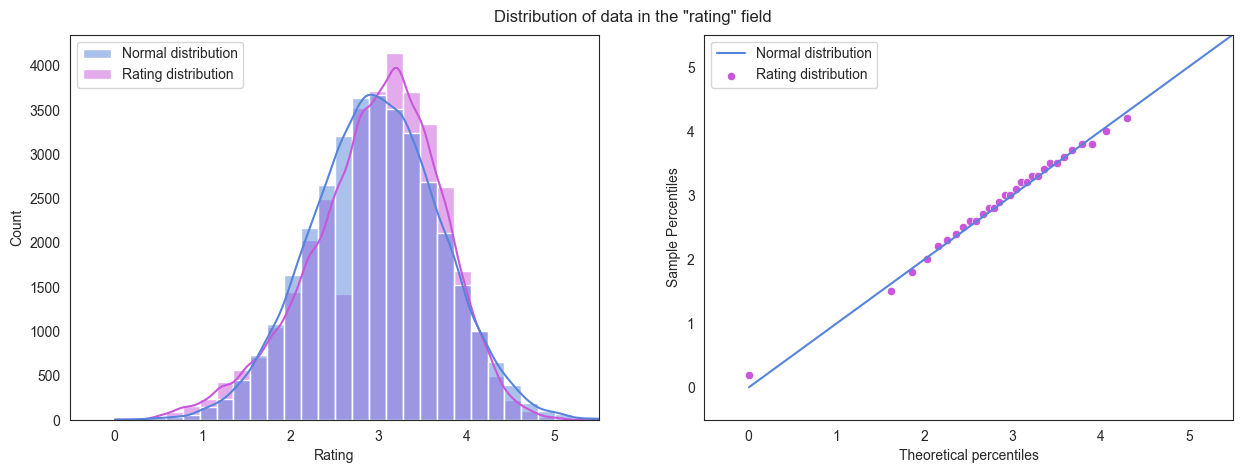

In [41]:
figure, grid = plt.figure(figsize=(15, 5)), GridSpec(1, 2, hspace=0.35)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

rating_distribution = df.loc[df["rating"].notna(), "rating"]
normal_distribution = np.random.normal(rating_distribution.mean(), rating_distribution.std(), rating_distribution.size)
percentiles = np.linspace(0, 100, 31)
rating, normal = np.percentile(rating_distribution, percentiles), np.percentile(normal_distribution, percentiles)

sns.histplot(data=pd.concat([pd.DataFrame({"value": normal_distribution,
                                           "type": ['theoretical']*normal_distribution.size}),
                             pd.DataFrame({"value": df["rating"],
                                           "type": ['sample']*df["rating"].size})]).reset_index(drop=True),
             x="value",
             hue="type",
             bins=31,
             kde=True,
             ax=figure.axes[0], 
             palette=sns.color_palette('hls', 10)[6::2])


sns.lineplot(x=normal, y=normal, ax=figure.axes[1], label='Normal distribution', color=sns.color_palette('hls', 10)[6])
sns.scatterplot(x=normal, y=rating, ax=figure.axes[1], label='Rating distribution', color=sns.color_palette('hls', 10)[8])

figure.suptitle('Distribution of data in the "rating" field', y=0.93)

figure.axes[0].set_xlabel('Rating')
figure.axes[0].set_xlim(0, 5)
figure.axes[0].set_xbound(-0.5, 5.5)
figure.axes[0].legend(figure.axes[0].get_legend().legend_handles, 
                      ['Normal distribution', 'Rating distribution'],
                      title='',
                      loc='upper left',
                      alignment='left')

figure.axes[1].set_xlabel('Theoretical percentiles')
figure.axes[1].set_ylabel('Sample Percentiles')
figure.axes[1].set_xlim(0, 5)
figure.axes[1].set_ylim(0, 5)
figure.axes[1].set_xbound(-0.5, 5.5)
figure.axes[1].set_ybound((-0.5, 5.5))
figure.axes[1].legend(alignment='left')

By visual evaluation of the histogram and Q-Q Plot, it can be concluded that the distribution of video game rating data follows a distribution law that is **close to normal**.

#### <a id=rating_distribution_by_genres>By genres</a>
***


For each genre from the top 10 in terms of the number of released video games, we will form **random samples** in the amount of **500** video games.

In [42]:
data, samples = df[df["category"] == "main"].explode('genres'), pd.DataFrame(index=range(500))

for genre in data.loc[:, "genres"].value_counts().iloc[:10].index:
    row = (data.loc[(data["genres"] == genre) & (data["rating"].notna()), "rating"]
           .sample(500, random_state=100, ignore_index=True))
    samples = samples.join(pd.DataFrame({genre: row}), how='inner')

Let's use the **Bartlett test** to test the samples for equality of variances. To do this, formulate the hypotheses of the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: the variances of the populations from which the samples are taken are **equal**.
- **H1**: the variances of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and run the **Bartlett test**.

In [43]:
stats.bartlett(*[samples[column] for column in samples.columns])

BartlettResult(statistic=10.889723316047261, pvalue=0.2833436835655099)


The p-value level is **0.28**. This means that **it is impossible to reject** the hypothesis H0 that the variances of the populations from which the samples were obtained are **equal**

For ANOVA, we formulate the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: means of the ratings of the populations from which the samples are taken are **equal**.
- **H1**: means of the ratings of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and do **ANOV**..

In [44]:
stats.f_oneway(*[samples[column] for column in samples.columns])

F_onewayResult(statistic=11.361884036894088, pvalue=8.609762969184047e-18)


The p-value level is **8.6e-18**. This means that one can **reject** the **H0** hypothesis that the averages of the video game ratings of the sampled populations are **equal**. We use the **Tukey HSD** post hoc multiple comparison test to pairwise compare all samples from the populations.

In [45]:
result = stats.tukey_hsd(*[samples[column] for column in samples.columns])

In [46]:
genres = data.loc[df["category"] == "main", "genres"].value_counts().iloc[:10].index.tolist()
table = pd.DataFrame(index=pd.MultiIndex.from_arrays([[genre for genre in genres for _ in range(9)], 
                                                      [x for i in range(10) for j, x in zip(range(10), genres) if i != j]]))

result = result.statistic, result.pvalue, result.confidence_interval()[0], result.confidence_interval()[1]
for i, statistics, pvalues, lowers, uppers in zip(range(10), *result):
    for j, statistic, pvalue, lower, upper in zip(range(10), statistics, pvalues, lowers, uppers): 
        if i != j:
            table.loc[(genres[i], genres[j]), ['statistic', 'p-value', 'lower CI', 'upper CI']] = statistic, pvalue, lower, upper
(table
 .style
 .format(lambda x: f'{x:.5f}'))

Text(0.5, 104.44444444444443, 'Statistic')

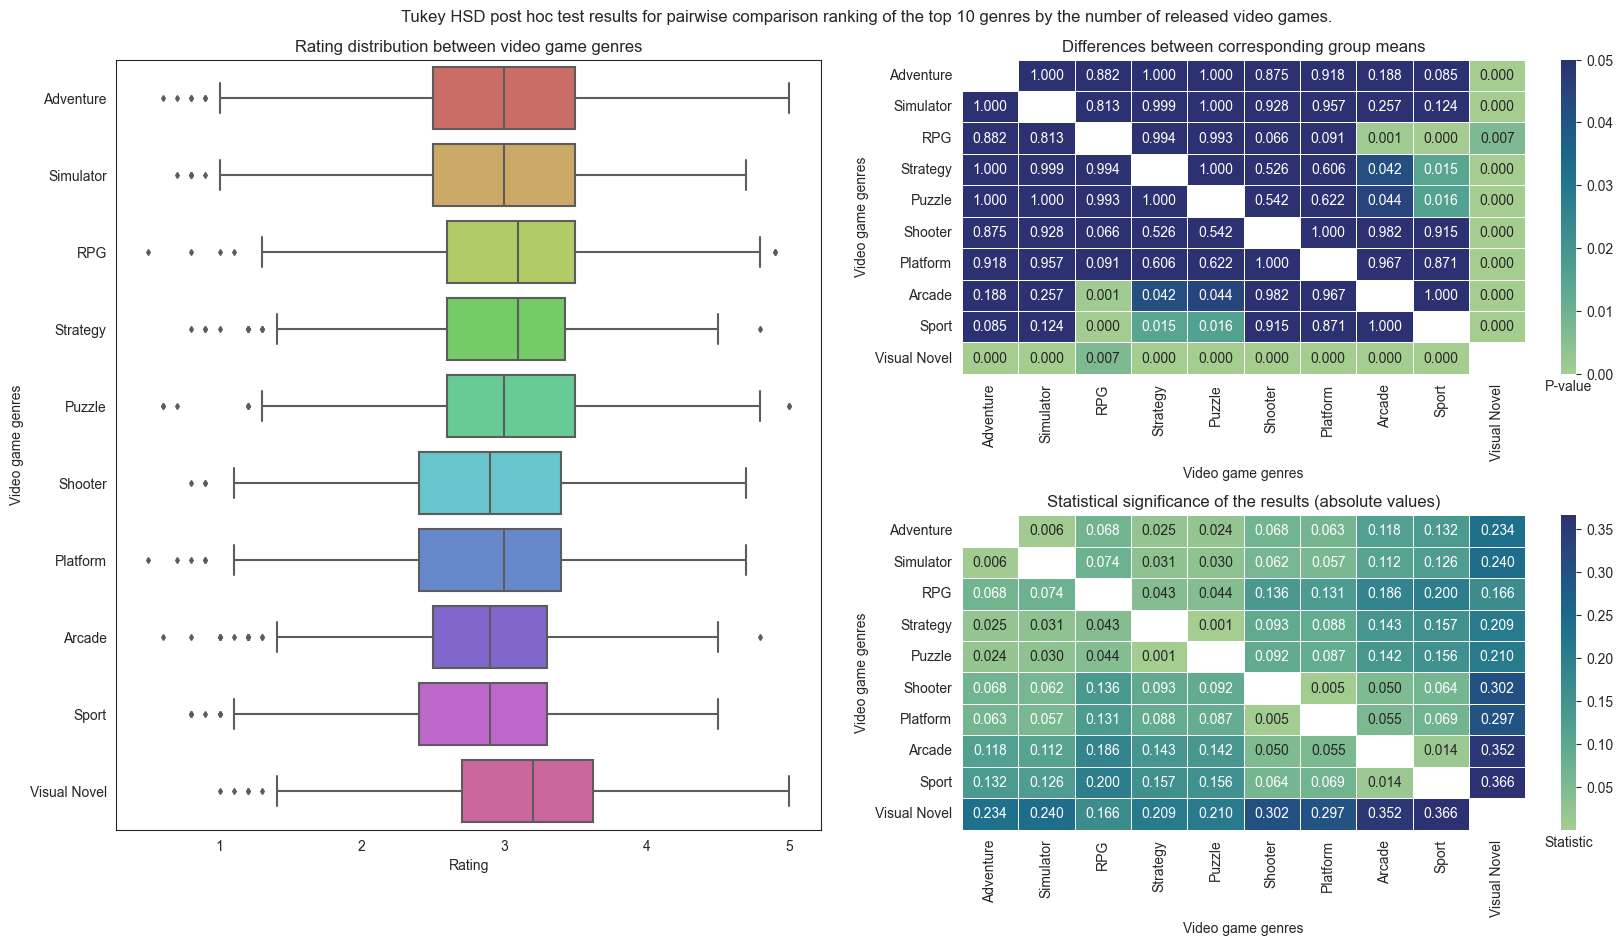

In [18]:
figure, grid = plt.figure(figsize=(20, 10)), GridSpec(2, 2, hspace=0.45, wspace=0.2)
figure.add_subplot(grid[:, 0])
figure.add_subplot(grid[0, 1])
figure.add_subplot(grid[1, 1])

genres = data.loc[df["category"] == "main", "genres"].value_counts().iloc[:10]

plot_data = samples.unstack().reset_index(level=0).rename(columns={"level_0": "genres", 0: "value"})

sns.boxplot(data=plot_data,
            x="value",
            y="genres",
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10), 
            fliersize=3)

plot_data = (table['p-value']
             .unstack(0)[genres.index]
             .sort_index(key=lambda x: genres.rank()[x], ascending=False))

sns.heatmap(data=plot_data,
            ax=figure.axes[1],
            annot=True,
            linewidths=.5,
            fmt=".3f", 
            cmap="crest",
            vmax=0.05)

plot_data = (table['statistic']
             .unstack(0)[genres.index]
             .sort_index(key=lambda x: genres.rank()[x], ascending=False)
             .abs())
             
sns.heatmap(data=plot_data,
            ax=figure.axes[2],
            annot=True,
            linewidths=.5,
            fmt=".3f", 
            cmap="crest")

figure.suptitle('Tukey HSD post hoc test results for pairwise comparison ranking of the top 10 genres '
                'by the number of released video games.', y=0.93)

figure.axes[0].set_title('Rating distribution between video game genres')
figure.axes[0].set_xlabel('Rating')
figure.axes[0].set_ylabel('Video game genres')

figure.axes[1].set_title('Differences between corresponding group means')
figure.axes[1].set_xlabel('Video game genres')
figure.axes[1].set_ylabel('Video game genres')

figure.axes[2].set_title('Statistical significance of the results (absolute values)')
figure.axes[2].set_xlabel('Video game genres')
figure.axes[2].set_ylabel('Video game genres')

figure.axes[3].set_xlabel('P-value')
figure.axes[4].set_xlabel('Statistic');

#### <a id=rating_distribution_by_developers>By developers</a>
***

For large companies and indie developers, we will form **random samples** of **500** video games.

In [48]:
data = df[(df["rating"].notna()) & (df["category"] == "main")].explode('developers')
samples = pd.DataFrame({"large_companies": (data.loc[(~data["indie"]), "rating"]
                                            .sample(500, random_state=100, ignore_index=True)),
                        "indie_developers": (data.loc[(data["indie"]), "rating"]
                                             .sample(500, random_state=100, ignore_index=True))})
samples.head()

,large_companies,indie_developers
0,3.1,3.3
1,3.3,3.3
2,2.7,4.2
3,2.2,3.1
4,4.8,3.8


Let's use the **Bartlett test** to test the samples for equality of variances. To do this, formulate the hypotheses of the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: the variances of the populations from which the samples are taken are **equal**.
- **H1**: the variances of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and run the **Bartlett test**.

In [50]:
stats.bartlett(samples["large_companies"], samples["indie_developers"])

BartlettResult(statistic=1.8471853172436803, pvalue=0.17411111380962058)

The p-value level is **0.17**. This means that **it is impossible to reject** the hypothesis H0 that the variances of the populations from which the samples were obtained are **equal**. 
Let's carry out a two-sample **Student's t-test** for **independent samples**, for which we formulate the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: means of the ratings of the populations from which the samples are taken are **equal**.
- **H1**: means of the ratings of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and do **Student's t-test** for **independent samples**.

In [51]:
stats.ttest_ind(samples["large_companies"], samples["indie_developers"])

Ttest_indResult(statistic=1.127287363381128, pvalue=0.2598919583688397)

The p-value level is **0.26**. This means that **cannot reject** the **H0** hypothesis that the average video game ratings of sample populations are **same**. Consider a sample of the **top 10 large companies** by number of video games released. The sample size is **150 video games**, since some companies did not release more games.

In [52]:
data, samples = df[df["category"] == "main"].explode('developers'), pd.DataFrame(index=range(150))

for developer in data.loc[~data["indie"], "developers"].value_counts().iloc[:10].index:
    row = (data.loc[(data["rating"].notna()) & (data["developers"] == developer), "rating"]
           .sample(150, random_state=100, ignore_index=True))
    samples = samples.join(pd.DataFrame({developer: row}), how='inner')
    
samples.head()

,Nintendo,Konami,Sega,Electronic Arts,Capcom,Activision,Sony Computer Entertainment,Square Enix,THQ,Bandai
0,3.5,3.4,1.4,3.5,3.8,3.2,1.2,2.2,3.7,3.1
1,2.8,3.4,3.6,1.5,3.7,4.3,2.7,2.4,2.4,2.7
2,2.9,3.8,3.5,2.2,3.2,3.1,3.8,2.9,3.5,2.8
3,3.0,2.8,3.4,2.2,3.5,2.9,2.9,3.4,2.7,2.2
4,3.8,3.1,3.8,3.3,1.3,2.7,2.4,3.8,2.8,3.7


Let's use the **Bartlett test** to test the samples for equality of variances. To do this, formulate the hypotheses of the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: the variances of the populations from which the samples are taken are **equal**.
- **H1**: the variances of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and run the **Bartlett test**.

In [23]:
stats.bartlett(*[samples[column] for column in samples.columns])

BartlettResult(statistic=11.580881510234905, pvalue=0.2379811796564053)

The p-value level is **0.24**. This means that **it is impossible to reject** the hypothesis H0 that the variances of the populations from which the samples were obtained are **equal**.

For ANOVA, we formulate the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: means of the ratings of the populations from which the samples are taken are **equal**.
- **H1**: means of the ratings of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and do **ANOV**..

In [24]:
stats.f_oneway(*[samples[column] for column in samples.columns])

F_onewayResult(statistic=14.594033023349567, pvalue=7.262145172040786e-23)

The p-value level is **7.3e-23**. This means that one can **reject** the **H0** hypothesis that the averages of the video game ratings of the sampled populations are **equal**. We use the **Tukey HSD** post hoc multiple comparison test to pairwise compare all samples from the populations.

In [25]:
result = stats.tukey_hsd(*[samples[column] for column in samples.columns])

In [26]:
developers = data.loc[~data["indie"], "developers"].value_counts().iloc[:10].index.tolist()
table = pd.DataFrame(index=pd.MultiIndex.from_arrays([[developer for developer in developers for _ in range(9)], 
                                                      [x for i in range(10) for j, x in zip(range(10), developers) if i != j]]))

result = result.statistic, result.pvalue, result.confidence_interval()[0], result.confidence_interval()[1]
for i, statistics, pvalues, lowers, uppers in zip(range(10), *result):
    for j, statistic, pvalue, lower, upper in zip(range(10), statistics, pvalues, lowers, uppers): 
        if i != j:
            table.loc[(developers[i], developers[j]), ['statistic', 'p-value', 'lower CI', 'upper CI']] = statistic, pvalue, lower, upper
(table
 .style
 .format(lambda x: f'{x:.5f}'))

Text(0.5, 104.44444444444443, 'Statistic')

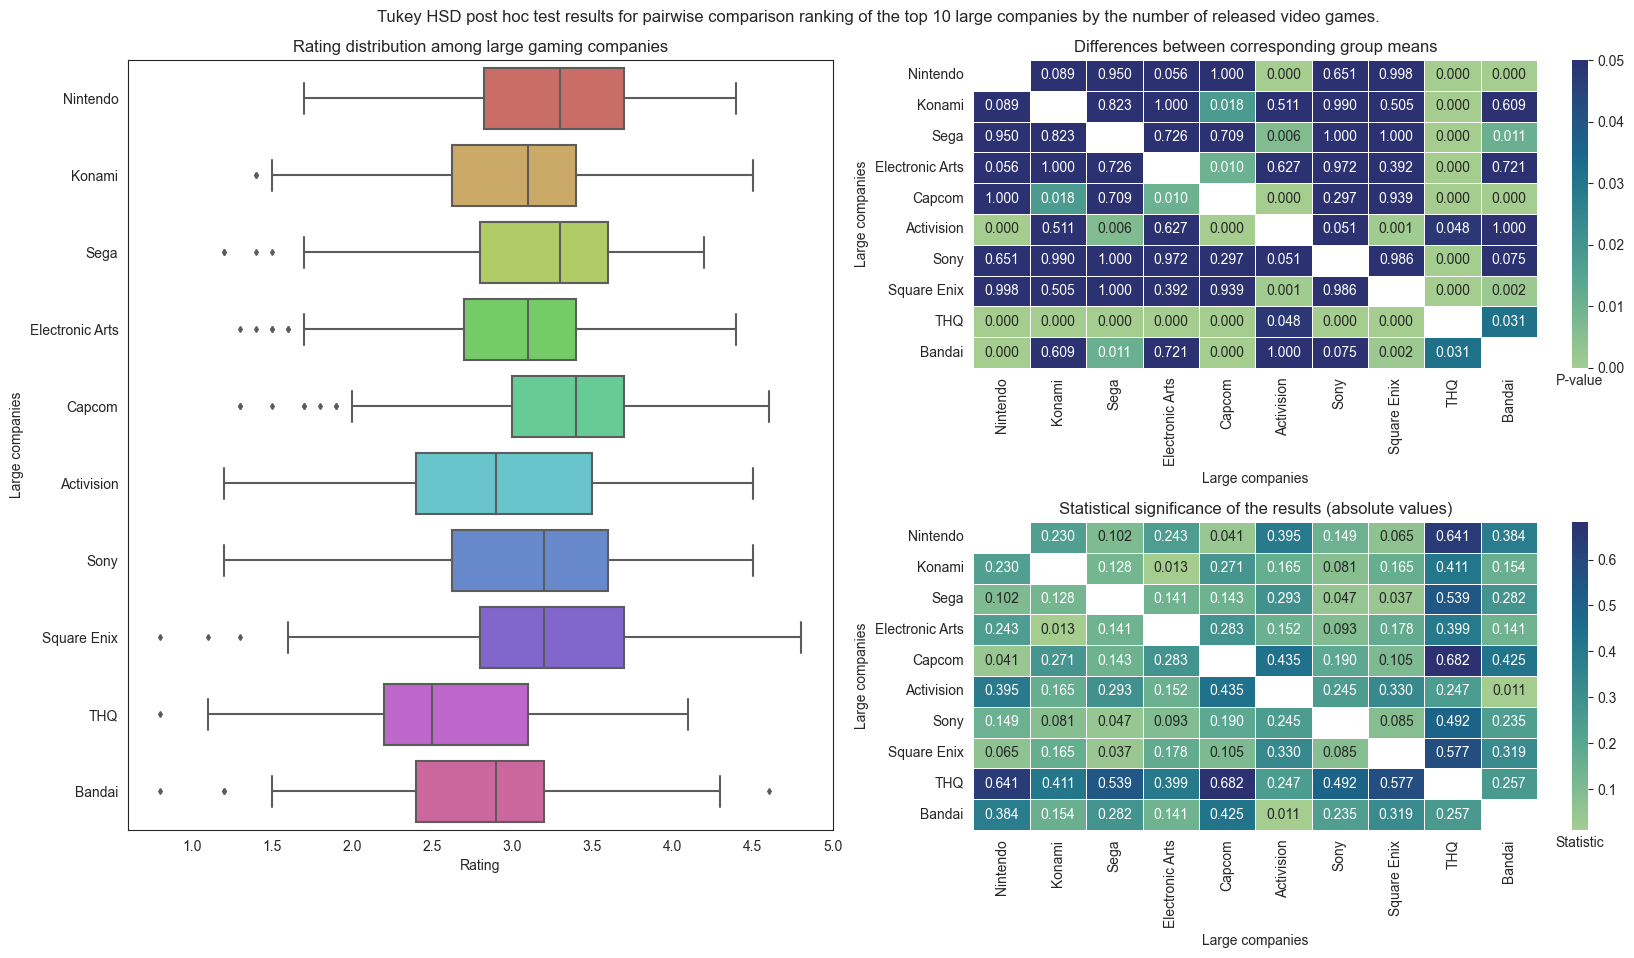

In [27]:
figure, grid = plt.figure(figsize=(20, 10)), GridSpec(2, 2, hspace=0.5, wspace=0.2)
figure.add_subplot(grid[:, 0])
figure.add_subplot(grid[0, 1])
figure.add_subplot(grid[1, 1])

developers = data.loc[~data["indie"], "developers"].value_counts().iloc[:10]
plot_data = (samples
             .unstack()
             .reset_index(level=0)
             .rename(columns={"level_0": "developers", 0: "value"})
             .replace("Sony Computer Entertainment", "Sony"))

sns.boxplot(data=plot_data,
            x="value",
            y="developers",
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10), 
            fliersize=3)

plot_data = (table['p-value']
             .unstack(0)[developers.index]
             .sort_index(key=lambda x: developers.rank()[x], ascending=False)
             .rename(columns={"Sony Computer Entertainment": "Sony"}, index={"Sony Computer Entertainment": "Sony"}))

sns.heatmap(data=plot_data,
            ax=figure.axes[1],
            annot=True,
            linewidths=.5,
            fmt=".3f", 
            cmap="crest",
            vmax=0.05)

plot_data = (table['statistic']
             .unstack(0)[developers.index]
             .sort_index(key=lambda x: developers.rank()[x], ascending=False)
             .rename(columns={"Sony Computer Entertainment": "Sony"}, index={"Sony Computer Entertainment": "Sony"})
             .abs())

sns.heatmap(data=plot_data,
            ax=figure.axes[2],
            annot=True,
            linewidths=.5,
            fmt=".3f", 
            cmap="crest")

figure.suptitle('Tukey HSD post hoc test results for pairwise comparison ranking of the top 10 large companies '
                'by the number of released video games.', y=0.93)

figure.axes[0].set_title('Rating distribution among large gaming companies')
figure.axes[0].set_xlabel('Rating')
figure.axes[0].set_ylabel('Large companies')

figure.axes[1].set_title('Differences between corresponding group means')
figure.axes[1].set_xlabel('Large companies')
figure.axes[1].set_ylabel('Large companies')

figure.axes[2].set_title('Statistical significance of the results (absolute values)')
figure.axes[2].set_xlabel('Large companies')
figure.axes[2].set_ylabel('Large companies')

figure.axes[3].set_xlabel('P-value')
figure.axes[4].set_xlabel('Statistic')

#### <a id=rating_distribution_by_platforms>By platforms</a>
***


For each platforms from the top 10 in terms of the number of released video games, we will form **random samples** in the amount of **500** video games.

In [53]:
data, samples = df.explode('platforms'), pd.DataFrame(index=range(500))

for platform in data.loc[data["category"] == "main", "platforms"].value_counts().iloc[:10].index:
    row = (data.loc[(data["category"] == "main") & (data["platforms"] == platform) & (data["rating"].notna()), "rating"]
           .sample(500, random_state=100, ignore_index=True))
    samples = samples.join(pd.DataFrame({platform: row}), how='inner')
    
samples.head()

,Windows PC,Mac,Nintendo Switch,Linux,PlayStation 4,iOS,Android,Xbox One,Web browser,PlayStation 3
0,1.6,3.1,3.9,3.3,3.2,4.1,2.5,2.1,3.1,2.5
1,3.0,2.7,1.9,2.9,2.9,3.6,3.5,1.2,3.3,2.4
2,3.8,3.2,3.7,2.5,3.2,3.0,3.5,1.1,2.9,3.4
3,2.9,3.6,2.8,3.6,1.5,4.1,1.7,3.5,2.6,3.5
4,3.8,4.1,3.5,1.5,2.7,3.0,3.2,2.2,3.6,3.3


Let's use the **Bartlett test** to test the samples for equality of variances. To do this, formulate the hypotheses of the main (**H0**) and alternative (**H1**) hypotheses:
- **H0**: the variances of the populations from which the samples are taken are **equal**.
- **H1**: the variances of the populations from which the samples are taken are **not equal**.

Set the significance level to **0.05** and run the **Bartlett test**.

In [29]:
stats.bartlett(*[samples[column] for column in samples.columns])

BartlettResult(statistic=41.36910577547039, pvalue=4.284563195113714e-06)

The p-value level is **4.28e-06**. This means that it is **impossible to reject** the H0 hypothesis that the variances of the populations from which the samples were drawn are **same**. The test results impose a **restriction on the use of ANOVA** for these samples.**..

## <a id=conclusions>Conclusions</a>
***